In [2]:
import numpy as np
from sys import exit
import os.path
from os import path
import csv
import time
import matplotlib
import matplotlib.pyplot as plt

In [3]:
current_directory = os.getcwd()
results_directory = os.path.join(current_directory, r'Results')


In [4]:
#FLUID PARAMETERS
rhoF = 1000
c0 = 40
gamma = 7
B = rhoF*c0**2/gamma
grav = np.array([0,-9.81]) 
#ARTIFICIAL VISCOSITY (voir plus loin)
alpha = 0.3
esp=10**(-6) #and it is multiplied by dr**2 in the code
#DENSITY DIFFUSION
densityDiffusion = True
delta = 0.2
#DENSITY & SHEPARD THRESHOLDS : 
shepardMin = 10**(-6)
rhoMin = 0.5*rhoF
rhoMax = 1.5*rhoF
#GEOMETRY
Lx = 2
Ly = 2
lx = 0.5
ly=1

In [5]:
dataname = os.path.join(results_directory,'Data_deltanu0.3_0.2.npy')
with open(dataname,'rb') as f:
    sim_0302 = np.load(f)
dataname = os.path.join(results_directory,'Data_deltanu0.1_0.2.npy')
with open(dataname,'rb') as f:
    sim_0102 = np.load(f)

dataname = os.path.join(results_directory,'Data_deltanu0.05_0.2.npy')    
with open(dataname,'rb') as f:
    sim_00502 = np.load(f)
    
dataname = os.path.join(results_directory,'Data_deltanu0.01_0.2.npy')    
with open(dataname,'rb') as f:
    sim_00102 = np.load(f)


dataname = os.path.join(results_directory,'Data_deltanu0.3_0.05.npy')    
with open(dataname,'rb') as f:
    sim_03005 = np.load(f)

    
dataname = os.path.join(results_directory,'Data_deltanu0.05_0.05.npy')    
with open(dataname,'rb') as f:
    sim_005005 = np.load(f)
    
dataname = os.path.join(results_directory,'Data_deltanu0.3_0.8.npy')    
with open(dataname,'rb') as f:
    sim_0308 = np.load(f)
    
dataname = os.path.join(results_directory,'Data_deltanu0.0_0.0.npy')    
with open(dataname,'rb') as f:
    sim_00 = np.load(f)

    
dataname = os.path.join(results_directory,'Data_deltanu0.0_0.8.npy')    
with open(dataname,'rb') as f:
    sim_008 = np.load(f)
    

dataname = os.path.join(results_directory,'Data_deltanu0.3_0.0.npy')    
with open(dataname,'rb') as f:
    sim_030 = np.load(f)
        
dataname = os.path.join(results_directory,'Data_deltanu0.05_0.0.npy')    
with open(dataname,'rb') as f:
    sim_0050 = np.load(f)
        

dataname = os.path.join(results_directory,'Data_deltanu0.0_0.05.npy')    
with open(dataname,'rb') as f:
    sim_0005 = np.load(f)
        


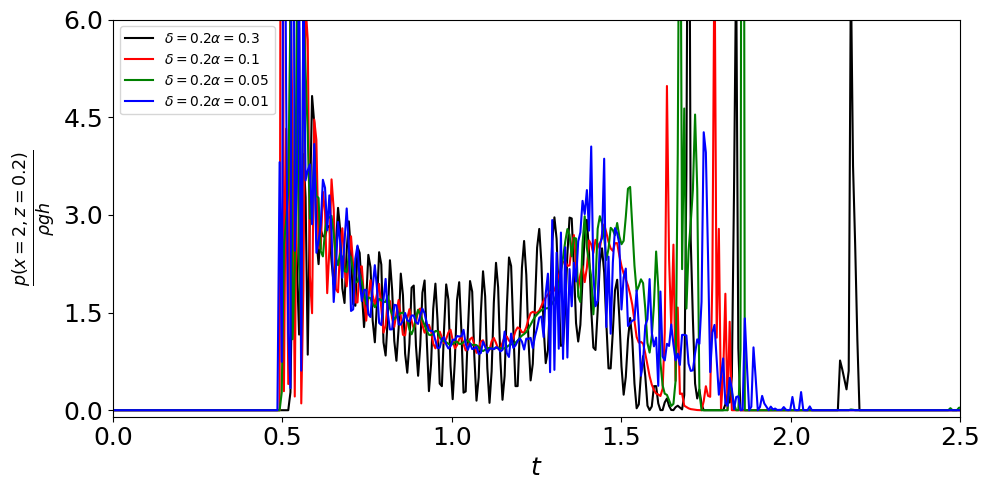

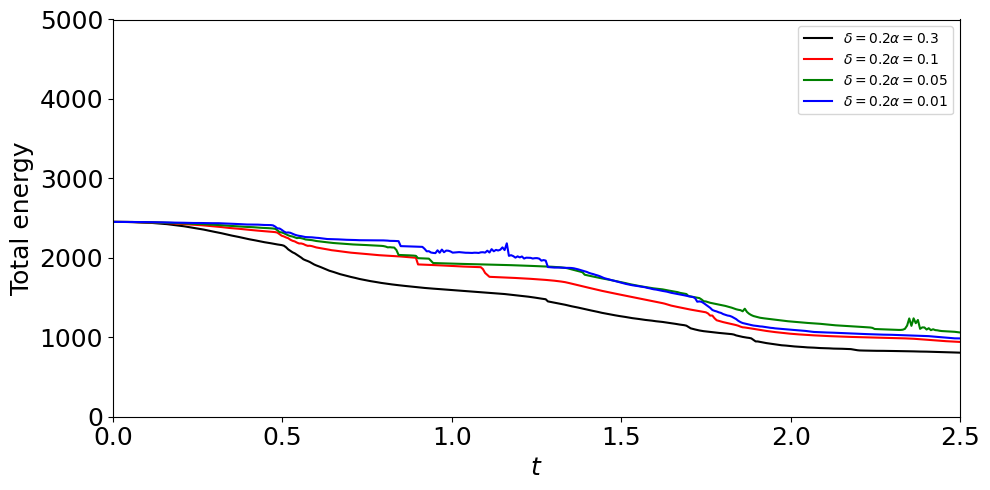

In [6]:
fig = plt.figure(figsize=(10,5))
plt.clf()
plt.plot(sim_0302[:,0],sim_0302[:,3]/(rhoF*0.2*np.linalg.norm(grav)),'-k',label=r'$\delta = 0.2 \alpha = 0.3$')
plt.plot(sim_0102[:,0],sim_0102[:,3]/(rhoF*0.2*np.linalg.norm(grav)),'-r',label=r'$\delta = 0.2 \alpha = 0.1$')
plt.plot(sim_00502[:,0],sim_00502[:,3]/(rhoF*0.2*np.linalg.norm(grav)),'-g',label=r'$\delta = 0.2 \alpha = 0.05$')
plt.plot(sim_00102[:,0],sim_00102[:,3]/(rhoF*0.2*np.linalg.norm(grav)),'-b',label=r'$\delta = 0.2 \alpha = 0.01$')

#plt.plot(sim_03005[:,0],sim_03005[:,3]/(rhoF*ly*np.linalg.norm(grav)),'-b',label=r'$\delta = 0.05 \alpha = 0.3$')
#plt.plot(sim_005005[:,0],sim_005005[:,3]/(rhoF*ly*np.linalg.norm(grav)),':b',label=r'$\delta = 0.05 \alpha = 0.05$')

#plt.plot(sim_0308[:,0],sim_0308[:,3]/(rhoF*ly*np.linalg.norm(grav)),'-r',label=r'$\delta = 0.8 \alpha = 0.3$')
#plt.plot(sim_008[:,0],sim_008[:,3]/(rhoF*ly*np.linalg.norm(grav)),':r',label=r'$\delta = 0.8 \alpha = 0$')


#plt.plot(sim_030[:,0],sim_030[:,3]/(rhoF*ly*np.linalg.norm(grav)),'-g',label=r'$\delta = 0 \alpha = 0.3$')
#plt.plot(sim_00[:,0],sim_00[:,3]/(rhoF*ly*np.linalg.norm(grav)),':g',label=r'$\delta = 0 \alpha = 0$')

plt.xlabel(r'$t$',fontsize=18)
plt.ylabel(r'$\frac{p(x=2,z=0.2)}{\rho gh}$',fontsize=18)

plt.xlim(0,2.5)
plt.ylim(-0.1,6)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
plt.legend(loc='upper left')
plt.tight_layout()


#plot figure of t and total mecanical energy
fig = plt.figure(figsize=(10,5))
plt.clf()
plt.plot(sim_0302[:,0],sim_0302[:,4],'-k',label=r'$\delta = 0.2 \alpha = 0.3$')
plt.plot(sim_0102[:,0],sim_0102[:,4],'-r',label=r'$\delta = 0.2 \alpha = 0.1$')
plt.plot(sim_00502[:,0],sim_00502[:,4],'-g',label=r'$\delta = 0.2 \alpha = 0.05$')
plt.plot(sim_00102[:,0],sim_00102[:,4],'-b',label=r'$\delta = 0.2 \alpha = 0.01$')

#plt.plot(sim_03005[:,0],sim_03005[:,4],'-b',label=r'$\delta = 0.05 \alpha = 0.3$')
#plt.plot(sim_0005[:,0],sim_0005[:,4],'-b',label=r'$\delta = 0.05 \alpha = 0$')
#plt.plot(sim_005005[:,0],sim_005005[:,4],':b',label=r'$\delta = 0.05 \alpha = 0.05$')


#plt.plot(sim_0308[:,0],sim_0308[:,4],'-r',label=r'$\delta = 0.8 \alpha = 0.3$')
#plt.plot(sim_008[:,0],sim_008[:,4],'-r',label=r'$\delta = 0.8 \alpha = 0$')

#plt.plot(sim_030[:,0],sim_030[:,4],'-g',label=r'$\delta = 0 \alpha = 0.3$')
#plt.plot(sim_00[:,0],sim_00[:,4],'-g',label=r'$\delta = 0 \alpha = 0$')
#plt.plot(sim_0050[:,0],sim_0050[:,4],'--g',label=r'$\delta = 0 \alpha = 0.05$')

plt.xlabel(r'$t$',fontsize=18)
plt.ylabel(r'Total energy',fontsize=18)

plt.xlim(0,2.5)
plt.ylim(0,5000)


ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


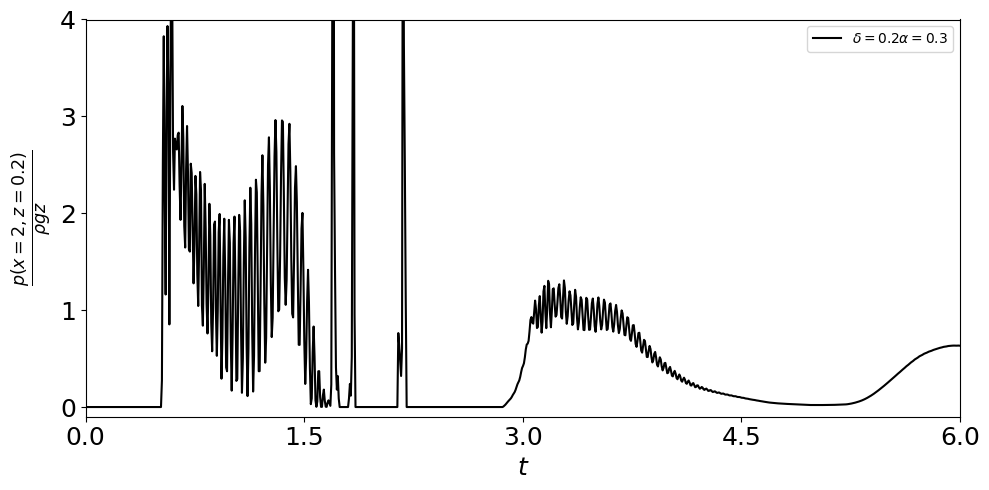

In [7]:
fig = plt.figure(figsize=(10,5))
plt.clf()
plt.plot(sim_0302[:,0],sim_0302[:,3]/(rhoF*0.2*np.linalg.norm(grav)),'-k',label=r'$\delta = 0.2 \alpha = 0.3$')
plt.ylabel(r'$\frac{p(x=2,z=0.2)}{\rho gz}$',fontsize=18)
plt.xlabel(r'$t$',fontsize=18)

ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
plt.legend(loc='upper right')
plt.xlim(0,6)
plt.ylim(-0.1,4)
plt.tight_layout()
plt.show(block=False)